In [68]:
import pandas, xarray, os
import numpy as np
from matplotlib import pyplot as plt

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
#import geodatasets
import cartopy.crs as ccrs
from cartopy.io.img_tiles import GoogleTiles

%matplotlib inline

In [69]:
#indir = '/Users/scollis/data/Kestrel/'
indir = '/Users/scollis/Library/CloudStorage/Box-Box/Kestrel/'

all_files = os.listdir(indir)
csvfiles = []
for fl in all_files:
    if 'csv' in fl and 'Jul_2' in fl:
        csvfiles.append(fl)

csvfiles.sort()

In [70]:
csvfiles

['ENVIRO_-_2798244_Jul_22_2024_10_10_54_AM.csv',
 'ENVIRO_-_2798244_Jul_22_2024_11_08_34_AM.csv',
 'ENVIRO_-_2798244_Jul_22_2024_11_20_39_AM.csv',
 'ENVIRO_-_2798244_Jul_22_2024_11_31_00_AM.csv',
 'ENVIRO_-_2798244_Jul_22_2024_11_38_40_AM.csv',
 'ENVIRO_-_2798244_Jul_22_2024_12_56_19_PM.csv',
 'ENVIRO_-_2798244_Jul_22_2024_1_11_29_PM.csv',
 'ENVIRO_-_2798244_Jul_22_2024_1_22_40_PM.csv',
 'ENVIRO_-_2798244_Jul_22_2024_1_30_10_PM.csv',
 'ENVIRO_-_2798244_Jul_22_2024_1_39_49_PM.csv',
 'ENVIRO_-_2798244_Jul_22_2024_1_45_19_PM.csv',
 'ENVIRO_-_2798244_Jul_22_2024_4_22_51_PM.csv',
 'ENVIRO_-_2798244_Jul_22_2024_4_36_45_PM.csv',
 'ENVIRO_-_2798244_Jul_22_2024_4_50_05_PM.csv',
 'ENVIRO_-_2798244_Jul_22_2024_5_07_05_PM.csv',
 'ENVIRO_-_2798244_Jul_22_2024_5_49_19_PM.csv',
 'ENVIRO_-_2798244_Jul_22_2024_6_27_39_PM.csv',
 'ENVIRO_-_2798244_Jul_22_2024_6_41_14_PM.csv',
 'ENVIRO_-_2798244_Jul_22_2024_6_54_50_PM.csv',
 'ENVIRO_-_2798244_Jul_22_2024_7_06_40_PM.csv',
 'ENVIRO_-_2798244_Jul_22_2024_7_1

In [71]:
def read_kest(fname, indir):
    print(fname)
    try:
        data = pandas.read_csv(os.path.join(indir, fname), header=3)
        units = data.iloc[0]
        data_formatted = data[1:]
        if units['Temperature'] == '°F':
            data_formatted.Temperature = (data_formatted.Temperature.astype(float)- 32.0)/1.8
            data_formatted['Dew Point'] = (data_formatted['Dew Point'].astype(float)- 32.0)/1.8
            
        else:
            data_formatted.Temperature = data_formatted.Temperature.astype(float)
            data_formatted['Dew Point'] = data_formatted['Dew Point'].astype(float)

        if units['Wind Speed'] == 'km/h':
            data_formatted['Wind Speed'] = data_formatted['Wind Speed'].astype(float)
        else:
            data_formatted['Wind Speed'] = data_formatted['Wind Speed'].astype(float)*1.60934
        
        data_formatted['Dew Point'] = data_formatted['Dew Point'].astype(float)
        data_formatted['Wind Speed'] = data_formatted['Wind Speed'].astype(float)
        data_formatted['time'] = pandas.to_datetime(data_formatted['FORMATTED DATE_TIME'])
        data_formatted = data_formatted.set_index('time')
        google_urls = data[1:]['Location coordinates'].values
        try:
            lat = [np.float(url.split('=')[-1].split(',')[0]) for url in google_urls]
            lon = [np.float(url.split('=')[-1].split(',')[1]) for url in google_urls]
            data_formatted.insert(0, 'Latitude', np.array(lat))
            data_formatted.insert(0, 'Longitude', np.array(lon))
        except:
            print("ahh Andriod?")
            lat = np.float(google_urls[0].split('=')[-1].split(',')[0])
            lon = np.float(google_urls[0].split('=')[-1].split(',')[1])
            data_formatted.insert(0, 'Latitude', np.array([lat]*len(google_urls)))
            data_formatted.insert(0, 'Longitude', np.array([lon]*len(google_urls)))
    except:
        print('no geo data')
        data_formatted = 'ERROR'
    return data_formatted

In [72]:
goods = []
bads = []
for fl in csvfiles:
    this = read_kest(fl, indir)
    if type(this) is str:
        bads.append(this)
    else:
        goods.append(this)


ENVIRO_-_2798244_Jul_22_2024_10_10_54_AM.csv
ENVIRO_-_2798244_Jul_22_2024_11_08_34_AM.csv
ENVIRO_-_2798244_Jul_22_2024_11_20_39_AM.csv
ENVIRO_-_2798244_Jul_22_2024_11_31_00_AM.csv
ENVIRO_-_2798244_Jul_22_2024_11_38_40_AM.csv
ENVIRO_-_2798244_Jul_22_2024_12_56_19_PM.csv
ENVIRO_-_2798244_Jul_22_2024_1_11_29_PM.csv
ENVIRO_-_2798244_Jul_22_2024_1_22_40_PM.csv
ENVIRO_-_2798244_Jul_22_2024_1_30_10_PM.csv
ENVIRO_-_2798244_Jul_22_2024_1_39_49_PM.csv
ENVIRO_-_2798244_Jul_22_2024_1_45_19_PM.csv
ENVIRO_-_2798244_Jul_22_2024_4_22_51_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2798244_Jul_22_2024_4_36_45_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2798244_Jul_22_2024_4_50_05_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2798244_Jul_22_2024_5_07_05_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2798244_Jul_22_2024_5_49_19_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2798244_Jul_22_2024_6_27_39_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2798244_Jul_22_2024_6_41_14_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2798244_Jul_22_202

/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted.Temperature = (data_formatted.Temperature.astype(float)- 32.0)/1.8
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted['Dew Point'] = (data_formatted['Dew Point'].astype(float)- 32.0)/1.8
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:18: Setting

ahh Andriod?
no geo data
ENVIRO_-_2798244_Jul_22_2024_9_12_40_AM.csv
ENVIRO_-_2798244_Jul_22_2024_9_22_35_AM.csv
ENVIRO_-_2798244_Jul_22_2024_9_29_25_AM.csv
ENVIRO_-_2798244_Jul_22_2024_9_40_15_AM.csv
ENVIRO_-_2798244_Jul_22_2024_9_51_00_AM.csv
ENVIRO_-_2798244_Jul_23_2024_10_05_20_AM.csv
ENVIRO_-_2798244_Jul_23_2024_10_54_40_AM.csv
ENVIRO_-_2798244_Jul_23_2024_11_06_15_AM.csv
ENVIRO_-_2798244_Jul_23_2024_11_16_00_AM.csv
ENVIRO_-_2798244_Jul_23_2024_11_24_50_AM.csv
ENVIRO_-_2798244_Jul_23_2024_11_38_20_AM.csv
ENVIRO_-_2798244_Jul_23_2024_1_24_45_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2798244_Jul_23_2024_1_38_24_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2798244_Jul_23_2024_1_50_29_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2798244_Jul_23_2024_2_03_20_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2798244_Jul_23_2024_2_17_10_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2798244_Jul_23_2024_2_31_15_PM (MC4wOTQ5MTIwMA).csv
ahh Andriod?
no geo data
ENVIRO_-_2798244_Jul_23_2024_2_31_15_PM.csv
ahh Andrio

/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted.Temperature = (data_formatted.Temperature.astype(float)- 32.0)/1.8
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted['Dew Point'] = (data_formatted['Dew Point'].astype(float)- 32.0)/1.8
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:18: Setting

ahh Andriod?
no geo data
ENVIRO_-_2798244_Jul_23_2024_3_55_34_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2798244_Jul_23_2024_8_38_25_AM.csv
ENVIRO_-_2798244_Jul_23_2024_8_53_40_AM.csv
ENVIRO_-_2798244_Jul_23_2024_9_06_05_AM.csv
ENVIRO_-_2798244_Jul_23_2024_9_18_20_AM.csv
ENVIRO_-_2798244_Jul_23_2024_9_38_35_AM.csv
ENVIRO_-_2798244_Jul_23_2024_9_47_40_AM.csv
ENVIRO_-_2802706_Jul_22,_2024___10_10_45_AM.csv
ahh Andriod?
ENVIRO_-_2802706_Jul_22,_2024___11_20_42_AM.csv
ahh Andriod?
ENVIRO_-_2802706_Jul_22,_2024___11_31_13_AM.csv
ahh Andriod?
ENVIRO_-_2802706_Jul_22,_2024___11_38_45_AM.csv
ahh Andriod?
ENVIRO_-_2802706_Jul_22,_2024___8_56_39_AM.csv
ahh Andriod?
ENVIRO_-_2802706_Jul_22,_2024___9_10_10_AM.csv
ahh Andriod?
ENVIRO_-_2802706_Jul_22,_2024___9_22_42_AM.csv
ahh Andriod?
ENVIRO_-_2802706_Jul_22,_2024___9_29_28_AM.csv
ahh Andriod?
ENVIRO_-_2802706_Jul_22,_2024___9_40_20_AM.csv
ahh Andriod?
ENVIRO_-_2802706_Jul_22,_2024___9_51_04_AM.csv
ahh Andriod?
ENVIRO_-_2802706_Jul_22_2024_12_41_24_

/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted.Temperature = (data_formatted.Temperature.astype(float)- 32.0)/1.8
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted['Dew Point'] = (data_formatted['Dew Point'].astype(float)- 32.0)/1.8
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:18: Setting

ENVIRO_-_2802706_Jul_22_2024_4_22_50_PM.csv
ENVIRO_-_2802706_Jul_22_2024_4_36_50_PM.csv
ENVIRO_-_2802706_Jul_22_2024_4_50_05_PM.csv
ENVIRO_-_2802706_Jul_22_2024_5_07_05_PM.csv
ENVIRO_-_2802706_Jul_22_2024_5_25_45_PM.csv
ENVIRO_-_2802706_Jul_22_2024_5_49_05_PM.csv
ENVIRO_-_2802706_Jul_22_2024_6_27_35_PM.csv
ENVIRO_-_2802706_Jul_22_2024_6_41_15_PM.csv
ENVIRO_-_2802706_Jul_22_2024_6_54_50_PM.csv
ENVIRO_-_2802706_Jul_22_2024_7_06_35_PM.csv
ENVIRO_-_2802706_Jul_22_2024_7_17_25_PM.csv
ENVIRO_-_2802706_Jul_22_2024_7_28_30_PM.csv
ENVIRO_-_2802706_Jul_23,_2024___10_05_26_AM.csv
ahh Andriod?
ENVIRO_-_2802706_Jul_23,_2024___10_54_13_AM.csv
ahh Andriod?
ENVIRO_-_2802706_Jul_23,_2024___11_06_18_AM.csv
ahh Andriod?
ENVIRO_-_2802706_Jul_23,_2024___11_15_29_AM.csv
ahh Andriod?
ENVIRO_-_2802706_Jul_23,_2024___11_24_53_AM.csv
ahh Andriod?
ENVIRO_-_2802706_Jul_23,_2024___11_38_24_AM.csv
ahh Andriod?
ENVIRO_-_2802706_Jul_23,_2024___8_39_40_AM.csv
ahh Andriod?
ENVIRO_-_2802706_Jul_23,_2024___8_53_19_AM.csv

/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted.Temperature = (data_formatted.Temperature.astype(float)- 32.0)/1.8
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted['Dew Point'] = (data_formatted['Dew Point'].astype(float)- 32.0)/1.8
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:18: Setting

ahh Andriod?
ENVIRO_-_2802706_Jul_23,_2024___9_47_42_AM.csv
ahh Andriod?
ENVIRO_-_2802706_Jul_23_2024_1_24_39_PM.csv
ENVIRO_-_2802706_Jul_23_2024_1_38_25_PM.csv
ENVIRO_-_2802706_Jul_23_2024_1_50_25_PM.csv
ENVIRO_-_2802706_Jul_23_2024_2_03_20_PM.csv
ENVIRO_-_2802706_Jul_23_2024_2_16_59_PM.csv
ENVIRO_-_2802706_Jul_23_2024_2_30_34_PM.csv
ENVIRO_-_2802706_Jul_23_2024_3_05_40_PM.csv
ENVIRO_-_2802706_Jul_23_2024_3_18_29_PM.csv
ENVIRO_-_2802706_Jul_23_2024_3_30_09_PM.csv
ENVIRO_-_2802706_Jul_23_2024_3_40_30_PM.csv
ENVIRO_-_2802706_Jul_23_2024_3_55_30_PM.csv
no geo data
ENVIRO_-_2802706_Jul_27,_2024___10_11_07_AM.csv
ahh Andriod?
ENVIRO_-_2802706_Jul_27,_2024___10_48_05_AM.csv
ahh Andriod?
ENVIRO_-_2802706_Jul_27,_2024___11_00_29_AM.csv
ahh Andriod?
ENVIRO_-_2802706_Jul_27,_2024___11_13_35_AM.csv
ahh Andriod?
ENVIRO_-_2802706_Jul_27,_2024___11_28_05_AM.csv
ahh Andriod?
ENVIRO_-_2802706_Jul_27,_2024___8_46_55_AM.csv
ahh Andriod?
ENVIRO_-_2802706_Jul_27,_2024___9_06_05_AM.csv
ahh Andriod?
ENVIRO

/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted.Temperature = (data_formatted.Temperature.astype(float)- 32.0)/1.8
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted['Dew Point'] = (data_formatted['Dew Point'].astype(float)- 32.0)/1.8
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:18: Setting

ahh Andriod?
ENVIRO_-_2802706_Jul_27,_2024___9_43_32_AM.csv
ahh Andriod?
ENVIRO_-_2803499_Jul_27_2024_10_11_05_AM.csv
ENVIRO_-_2803499_Jul_27_2024_10_27_59_AM.csv
ENVIRO_-_2803499_Jul_27_2024_11_01_59_AM.csv
ENVIRO_-_2803499_Jul_27_2024_11_28_59_AM.csv
ENVIRO_-_2803499_Jul_27_2024_9_44_10_AM.csv
ENVIRO_-_2803499_Jul_28_2024_10_34_25_AM.csv
ahh Andriod?
no geo data
ENVIRO_-_2803499_Jul_28_2024_10_50_40_AM.csv
ENVIRO_-_2803499_Jul_28_2024_11_03_05_AM.csv
ENVIRO_-_2803499_Jul_28_2024_11_20_59_AM.csv
ENVIRO_-_2803499_Jul_28_2024_12_59_55_PM.csv
ENVIRO_-_2803499_Jul_28_2024_1_19_15_PM.csv
ENVIRO_-_2803499_Jul_28_2024_1_31_14_PM.csv
ENVIRO_-_2803499_Jul_28_2024_1_44_25_PM.csv
ENVIRO_-_2803499_Jul_28_2024_2_08_00_PM.csv
ENVIRO_-_2803499_Jul_28_2024_9_53_10_AM.csv


/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted['time'] = pandas.to_datetime(data_formatted['FORMATTED DATE_TIME'])
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:26: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = [np.float(url.split('=')[-1].split(',')[0]) for url in google_urls]
/var/folder

ENVIRO_-_2803513_Jul_27_2024_2_09_00_PM.csv
ENVIRO_-_2803513_Jul_27_2024_2_30_09_PM.csv
ENVIRO_-_2803513_Jul_27_2024_2_48_04_PM.csv
ENVIRO_-_2803513_Jul_27_2024_2_59_55_PM.csv
ENVIRO_-_2803513_Jul_27_2024_3_11_40_PM.csv
ENVIRO_-_2803513_Jul_27_2024_3_28_10_PM.csv
ENVIRO_-_2803513_Jul_27_2024_3_52_30_PM.csv
ENVIRO_-_2803513_Jul_27_2024_4_05_00_PM (MC43MzAwODcwMA).csv
ENVIRO_-_2803513_Jul_27_2024_4_05_00_PM.csv
ENVIRO_-_2803513_Jul_27_2024_6_32_30_PM.csv
ENVIRO_-_2803513_Jul_27_2024_6_47_29_PM.csv
ENVIRO_-_2803513_Jul_27_2024_7_11_34_PM.csv
ENVIRO_-_2803513_Jul_28_2024_10_32_56_AM.csv
ENVIRO_-_2803513_Jul_28_2024_10_50_31_AM (MC4zNTk4MTUwMA).csv
ENVIRO_-_2803513_Jul_28_2024_10_50_31_AM.csv
ENVIRO_-_2803513_Jul_28_2024_11_03_05_AM.csv
ENVIRO_-_2803513_Jul_28_2024_11_20_55_AM.csv
ENVIRO_-_2803513_Jul_28_2024_12_59_55_PM.csv


/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted.Temperature = (data_formatted.Temperature.astype(float)- 32.0)/1.8
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted['Dew Point'] = (data_formatted['Dew Point'].astype(float)- 32.0)/1.8
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:18: Setting

ENVIRO_-_2803513_Jul_28_2024_1_19_10_PM.csv
ENVIRO_-_2803513_Jul_28_2024_1_31_10_PM.csv
ENVIRO_-_2803513_Jul_28_2024_1_44_25_PM.csv
ENVIRO_-_2803513_Jul_28_2024_2_07_55_PM.csv
ENVIRO_-_2803513_Jul_28_2024_9_49_49_AM.csv
ENVIRO_-_2836126_Jul_22,_2024___12_56_11_PM.csv
ahh Andriod?
ENVIRO_-_2836126_Jul_22,_2024___1_11_27_PM.csv
ahh Andriod?
ENVIRO_-_2836126_Jul_22,_2024___1_22_39_PM.csv
ahh Andriod?
ENVIRO_-_2836126_Jul_22,_2024___1_30_13_PM.csv
ahh Andriod?
ENVIRO_-_2836126_Jul_22,_2024___1_39_27_PM.csv
ahh Andriod?
ENVIRO_-_2836126_Jul_22,_2024___1_45_24_PM.csv
ahh Andriod?
ENVIRO_-_2836126_Jul_22,_2024___2_24_03_PM (MC40MjQwMTgwMA).csv
ahh Andriod?
ENVIRO_-_2836126_Jul_22,_2024___2_24_03_PM.csv
ahh Andriod?
ENVIRO_-_2836126_Jul_22,_2024___2_43_06_PM.csv
ahh Andriod?
ENVIRO_-_2836126_Jul_22,_2024___2_57_16_PM.csv
ahh Andriod?
ENVIRO_-_2836126_Jul_22,_2024___3_11_02_PM.csv
ahh Andriod?
ENVIRO_-_2836126_Jul_22,_2024___4_22_52_PM.csv
ahh Andriod?
ENVIRO_-_2836126_Jul_22,_2024___4_36_47_PM

/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted.Temperature = (data_formatted.Temperature.astype(float)- 32.0)/1.8
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted['Dew Point'] = (data_formatted['Dew Point'].astype(float)- 32.0)/1.8
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:18: Setting

ahh Andriod?
ENVIRO_-_2836126_Jul_22,_2024___5_49_11_PM.csv
ahh Andriod?
ENVIRO_-_2836126_Jul_22,_2024___6_27_40_PM.csv
ahh Andriod?
ENVIRO_-_2836126_Jul_22,_2024___6_41_19_PM.csv
ahh Andriod?
ENVIRO_-_2836126_Jul_22,_2024___6_54_55_PM.csv
ahh Andriod?
ENVIRO_-_2836126_Jul_22,_2024___7_06_42_PM.csv
ahh Andriod?
ENVIRO_-_2836126_Jul_22,_2024___7_17_26_PM.csv
ahh Andriod?
ENVIRO_-_2836126_Jul_22,_2024___7_28_38_PM.csv
ahh Andriod?
ENVIRO_-_2836126_Jul_23,_2024___1_24_47_PM.csv
ahh Andriod?
ENVIRO_-_2836126_Jul_23,_2024___1_38_30_PM.csv
ahh Andriod?
ENVIRO_-_2836126_Jul_23,_2024___1_50_33_PM.csv
ahh Andriod?
ENVIRO_-_2836126_Jul_23,_2024___2_03_23_PM.csv
ahh Andriod?
ENVIRO_-_2836126_Jul_23,_2024___2_17_14_PM.csv
ahh Andriod?
ENVIRO_-_2836126_Jul_23,_2024___2_30_40_PM.csv
ahh Andriod?
ENVIRO_-_2836126_Jul_23,_2024___3_05_45_PM.csv
ahh Andriod?
ENVIRO_-_2836126_Jul_23,_2024___3_18_36_PM.csv
ahh Andriod?
ENVIRO_-_2836126_Jul_23,_2024___3_30_19_PM.csv
ahh Andriod?
ENVIRO_-_2836126_Jul_23,_20

/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:32: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = np.float(google_urls[0].split('=')[-1].split(',')[0])
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:33: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = np.float(google_

ENVIRO_-_2836126_Jul_27_2024_10_28_10_AM.csv
ENVIRO_-_2836126_Jul_27_2024_10_33_31_AM.csv
ENVIRO_-_2836126_Jul_27_2024_10_41_20_AM.csv
ENVIRO_-_2836126_Jul_27_2024_10_47_45_AM.csv
ENVIRO_-_2836126_Jul_27_2024_11_02_51_AM.csv
ENVIRO_-_2836126_Jul_27_2024_11_39_31_AM.csv
ENVIRO_-_2836126_Jul_27_2024_11_44_21_AM.csv
ENVIRO_-_2836126_Jul_27_2024_11_51_01_AM.csv
ENVIRO_-_2836126_Jul_27_2024_11_58_41_AM.csv
ENVIRO_-_2836126_Jul_27_2024_12_05_41_PM.csv
ENVIRO_-_2836126_Jul_27_2024_12_10_36_PM.csv
ENVIRO_-_2836126_Jul_27_2024_12_15_11_PM.csv
ENVIRO_-_2836126_Jul_27_2024_12_21_11_PM.csv
ENVIRO_-_2836126_Jul_27_2024_12_25_06_PM.csv
ENVIRO_-_2836126_Jul_27_2024_12_30_41_PM.csv
ENVIRO_-_2836126_Jul_27_2024_2_02_30_PM.csv
ENVIRO_-_2836126_Jul_27_2024_8_11_10_AM.csv
ENVIRO_-_2836126_Jul_27_2024_8_56_30_AM.csv
ENVIRO_-_2836126_Jul_27_2024_9_55_20_AM.csv
ENVIRO_-_2836126_Jul_28,_2024___11_00_06_AM.csv


/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted.Temperature = data_formatted.Temperature.astype(float)
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted['Dew Point'] = data_formatted['Dew Point'].astype(float)
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:16: SettingWithCopyWarning: 
A va

ahh Andriod?
ENVIRO_-_2836126_Jul_28,_2024___11_30_05_AM.csv
ahh Andriod?
ENVIRO_-_2836126_Jul_28,_2024___12_00_09_PM.csv
ahh Andriod?
ENVIRO_-_2836126_Jul_28,_2024___1_00_58_PM.csv
ahh Andriod?
ENVIRO_-_2836126_Jul_28,_2024___2_01_49_PM.csv
ahh Andriod?
ENVIRO_-_2836126_Jul_28,_2024___2_57_59_PM.csv
ahh Andriod?
ENVIRO_-_2836126_Jul_28,_2024___8_45_26_AM.csv
ahh Andriod?
ENVIRO_-_2836135_Jul_22_2024_8_56_40_AM.csv
ENVIRO_-_2836135_Jul_27,_2024___1_22_52_PM.csv
ahh Andriod?
ENVIRO_-_2836135_Jul_27,_2024___2_09_10_PM.csv
ahh Andriod?
ENVIRO_-_2836135_Jul_27,_2024___2_30_01_PM.csv
ahh Andriod?
ENVIRO_-_2836135_Jul_27,_2024___2_48_01_PM.csv
ahh Andriod?
ENVIRO_-_2836135_Jul_27,_2024___3_11_13_PM.csv
ahh Andriod?
ENVIRO_-_2836135_Jul_27,_2024___3_28_05_PM.csv
ahh Andriod?
ENVIRO_-_2836135_Jul_27,_2024___3_52_31_PM.csv
ahh Andriod?
ENVIRO_-_2836135_Jul_27,_2024___5_06_46_PM.csv
ahh Andriod?
ENVIRO_-_2836135_Jul_27,_2024___5_52_55_PM.csv
ahh Andriod?
ENVIRO_-_2836135_Jul_27,_2024___6_32_33_P

/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted.Temperature = (data_formatted.Temperature.astype(float)- 32.0)/1.8
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted['Dew Point'] = (data_formatted['Dew Point'].astype(float)- 32.0)/1.8
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:18: Setting

ahh Andriod?
ENVIRO_-_2836135_Jul_27,_2024___7_25_47_PM.csv
ahh Andriod?
ENVIRO_-_2836135_Jul_27_2024_8_50_06_AM.csv
ENVIRO_-_2836135_Jul_28,_2024___10_32_45_AM.csv
ahh Andriod?
ENVIRO_-_2836135_Jul_28,_2024___10_50_31_AM.csv
ahh Andriod?
ENVIRO_-_2836135_Jul_28,_2024___11_03_08_AM.csv
ahh Andriod?
ENVIRO_-_2836135_Jul_28,_2024___11_21_00_AM.csv
ahh Andriod?
ENVIRO_-_2836135_Jul_28,_2024___12_59_58_PM.csv
ahh Andriod?
ENVIRO_-_2836135_Jul_28,_2024___9_49_34_AM (MC41MDg4MDkwMA).csv
ahh Andriod?
ENVIRO_-_2836135_Jul_28,_2024___9_49_34_AM (MC43MzMzMDYwMA).csv
ahh Andriod?
ENVIRO_-_2836135_Jul_28,_2024___9_49_34_AM.csv
ahh Andriod?
ENVIRO_-_2836135_Jul_28_2024_1_19_10_PM.csv
ENVIRO_-_2836135_Jul_28_2024_1_31_10_PM.csv
ENVIRO_-_2836135_Jul_28_2024_1_44_25_PM.csv
ENVIRO_-_2836135_Jul_28_2024_2_03_00_PM.csv
ENVIRO_-_2836135_Jul_28_2024_2_08_00_PM.csv


/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted.Temperature = (data_formatted.Temperature.astype(float)- 32.0)/1.8
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted['Dew Point'] = (data_formatted['Dew Point'].astype(float)- 32.0)/1.8
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:18: Setting

ENVIRO_-_2845074_Jul_22_2024_10_10_54_AM.csv
ENVIRO_-_2845074_Jul_22_2024_11_20_51_AM.csv
ENVIRO_-_2845074_Jul_22_2024_11_32_00_AM.csv
ENVIRO_-_2845074_Jul_22_2024_11_38_45_AM.csv
ENVIRO_-_2845074_Jul_22_2024_12_56_05_PM.csv
ENVIRO_-_2845074_Jul_22_2024_1_11_20_PM.csv
ENVIRO_-_2845074_Jul_22_2024_1_22_40_PM.csv
ENVIRO_-_2845074_Jul_22_2024_1_30_10_PM.csv
ENVIRO_-_2845074_Jul_22_2024_1_39_25_PM.csv
ENVIRO_-_2845074_Jul_22_2024_1_45_20_PM.csv
ENVIRO_-_2845074_Jul_22_2024_2_23_49_PM.csv
ENVIRO_-_2845074_Jul_22_2024_2_43_09_PM.csv
ENVIRO_-_2845074_Jul_22_2024_2_57_09_PM.csv
ENVIRO_-_2845074_Jul_22_2024_3_10_59_PM.csv
ENVIRO_-_2845074_Jul_22_2024_4_23_05_PM.csv
ENVIRO_-_2845074_Jul_22_2024_4_50_15_PM.csv
ENVIRO_-_2845074_Jul_22_2024_5_07_04_PM.csv
ENVIRO_-_2845074_Jul_22_2024_5_20_49_PM.csv
ENVIRO_-_2845074_Jul_22_2024_5_25_49_PM.csv
ENVIRO_-_2845074_Jul_22_2024_5_49_44_PM.csv
ENVIRO_-_2845074_Jul_22_2024_6_27_34_PM.csv
ENVIRO_-_2845074_Jul_22_2024_6_41_14_PM.csv
ENVIRO_-_2845074_Jul_22_202

/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:26: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = [np.float(url.split('=')[-1].split(',')[0]) for url in google_urls]
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:27: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = [n

ENVIRO_-_2845074_Jul_22_2024_7_28_29_PM.csv
ENVIRO_-_2845074_Jul_22_2024_8_56_50_AM.csv
ENVIRO_-_2845074_Jul_22_2024_9_10_05_AM.csv
ENVIRO_-_2845074_Jul_22_2024_9_22_40_AM.csv
ENVIRO_-_2845074_Jul_22_2024_9_29_30_AM.csv
ENVIRO_-_2845074_Jul_22_2024_9_40_20_AM.csv
ENVIRO_-_2845074_Jul_22_2024_9_51_05_AM.csv
ENVIRO_-_2845074_Jul_23_2024_10_05_29_AM.csv
ENVIRO_-_2845074_Jul_23_2024_10_54_05_AM.csv
ENVIRO_-_2845074_Jul_23_2024_11_06_21_AM.csv
ENVIRO_-_2845074_Jul_23_2024_11_15_25_AM.csv
ENVIRO_-_2845074_Jul_23_2024_11_25_00_AM.csv
ENVIRO_-_2845074_Jul_23_2024_11_38_25_AM.csv
ENVIRO_-_2845074_Jul_23_2024_1_24_55_PM.csv
ENVIRO_-_2845074_Jul_23_2024_1_38_25_PM.csv
ENVIRO_-_2845074_Jul_23_2024_1_50_30_PM.csv
ENVIRO_-_2845074_Jul_23_2024_2_03_15_PM.csv
ENVIRO_-_2845074_Jul_23_2024_2_17_15_PM.csv
ENVIRO_-_2845074_Jul_23_2024_2_30_35_PM.csv
ENVIRO_-_2845074_Jul_23_2024_3_05_40_PM.csv
ENVIRO_-_2845074_Jul_23_2024_3_18_30_PM.csv
ENVIRO_-_2845074_Jul_23_2024_3_30_10_PM.csv
ENVIRO_-_2845074_Jul_23_20

/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted.Temperature = (data_formatted.Temperature.astype(float)- 32.0)/1.8
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted['Dew Point'] = (data_formatted['Dew Point'].astype(float)- 32.0)/1.8
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:18: Setting

ENVIRO_-_2845074_Jul_23_2024_3_55_50_PM.csv
ENVIRO_-_2845074_Jul_23_2024_8_38_44_AM.csv
ENVIRO_-_2845074_Jul_23_2024_8_53_20_AM.csv
ENVIRO_-_2845074_Jul_23_2024_9_06_14_AM.csv
ENVIRO_-_2845074_Jul_23_2024_9_18_25_AM.csv
ENVIRO_-_2845074_Jul_23_2024_9_38_20_AM.csv
ENVIRO_-_2845074_Jul_23_2024_9_47_44_AM.csv
ENVIRO_-_2845074_Jul_27,_2024___10_11_09_AM.csv
ahh Andriod?
ENVIRO_-_2845074_Jul_27,_2024___10_28_10_AM.csv
ahh Andriod?
ENVIRO_-_2845074_Jul_27,_2024___11_00_18_AM.csv
ahh Andriod?
ENVIRO_-_2845074_Jul_27,_2024___11_28_40_AM.csv
ahh Andriod?
ENVIRO_-_2845074_Jul_27,_2024___8_50_06_AM.csv
ahh Andriod?
ENVIRO_-_2845074_Jul_27,_2024___9_10_10_AM.csv
ahh Andriod?
ENVIRO_-_2845074_Jul_27,_2024___9_45_35_AM.csv
ahh Andriod?
ENVIRO_-_2845074_Jul_27_2024_2_09_00_PM.csv
ENVIRO_-_2845074_Jul_27_2024_2_29_59_PM.csv
ENVIRO_-_2845074_Jul_27_2024_2_48_00_PM.csv
ENVIRO_-_2845074_Jul_27_2024_2_59_45_PM.csv
ENVIRO_-_2845074_Jul_27_2024_3_28_50_PM.csv
ENVIRO_-_2845074_Jul_27_2024_3_52_29_PM.csv


/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted.Temperature = (data_formatted.Temperature.astype(float)- 32.0)/1.8
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted['Dew Point'] = (data_formatted['Dew Point'].astype(float)- 32.0)/1.8
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:18: Setting

ENVIRO_-_2845074_Jul_27_2024_4_04_59_PM.csv
ENVIRO_-_2845074_Jul_27_2024_6_32_35_PM.csv
ENVIRO_-_2845074_Jul_27_2024_6_47_49_PM.csv
ENVIRO_-_2845074_Jul_27_2024_7_11_29_PM.csv
ENVIRO_-_2845074_Jul_27_2024_7_24_39_PM.csv
ENVIRO_-_2845074_Jul_28_2024_10_32_45_AM.csv
ENVIRO_-_2845074_Jul_28_2024_10_50_34_AM.csv
ENVIRO_-_2845074_Jul_28_2024_11_03_10_AM.csv
ENVIRO_-_2845074_Jul_28_2024_11_21_00_AM.csv
ENVIRO_-_2845074_Jul_28_2024_1_00_01_PM.csv
ENVIRO_-_2845074_Jul_28_2024_1_19_15_PM.csv
ENVIRO_-_2845074_Jul_28_2024_1_31_15_PM.csv


/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted.Temperature = data_formatted.Temperature.astype(float)
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted['Dew Point'] = data_formatted['Dew Point'].astype(float)
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:16: SettingWithCopyWarning: 
A va

ENVIRO_-_2845074_Jul_28_2024_1_44_35_PM.csv
ENVIRO_-_2845074_Jul_28_2024_2_08_05_PM.csv
ENVIRO_-_2845074_Jul_28_2024_9_49_54_AM.csv
ENVIRO_-_2851262_Jul_22,_2024___10_10_52_AM.csv
ahh Andriod?
ENVIRO_-_2851262_Jul_22,_2024___11_20_46_AM.csv
ahh Andriod?
ENVIRO_-_2851262_Jul_22,_2024___11_31_10_AM.csv
ahh Andriod?
ENVIRO_-_2851262_Jul_22,_2024___11_38_50_AM.csv
ahh Andriod?
ENVIRO_-_2851262_Jul_22,_2024___8_56_40_AM.csv
ahh Andriod?
ENVIRO_-_2851262_Jul_22,_2024___9_10_09_AM.csv
ahh Andriod?
ENVIRO_-_2851262_Jul_22,_2024___9_22_43_AM.csv
ahh Andriod?
ENVIRO_-_2851262_Jul_22,_2024___9_29_33_AM.csv
ahh Andriod?
ENVIRO_-_2851262_Jul_22,_2024___9_40_20_AM.csv
ahh Andriod?
ENVIRO_-_2851262_Jul_22,_2024___9_51_08_AM.csv
ahh Andriod?
ENVIRO_-_2851262_Jul_22_2024_1_11_30_PM.csv
ENVIRO_-_2851262_Jul_22_2024_1_22_40_PM.csv
ENVIRO_-_2851262_Jul_22_2024_1_30_10_PM.csv
ENVIRO_-_2851262_Jul_22_2024_1_39_25_PM.csv
ENVIRO_-_2851262_Jul_22_2024_1_45_20_PM.csv
ENVIRO_-_2851262_Jul_22_2024_2_23_55_PM.csv


/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted.Temperature = (data_formatted.Temperature.astype(float)- 32.0)/1.8
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted['Dew Point'] = (data_formatted['Dew Point'].astype(float)- 32.0)/1.8
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:18: Setting

ENVIRO_-_2851262_Jul_22_2024_4_50_04_PM.csv
ENVIRO_-_2851262_Jul_22_2024_5_07_15_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2851262_Jul_22_2024_5_26_51_PM.csv
ENVIRO_-_2851262_Jul_22_2024_5_49_05_PM.csv
ENVIRO_-_2851262_Jul_22_2024_6_28_54_PM.csv
ENVIRO_-_2851262_Jul_22_2024_6_37_50_AM (MC44MTcyMjgwMA).csv
ENVIRO_-_2851262_Jul_22_2024_6_37_50_AM.csv
ENVIRO_-_2851262_Jul_22_2024_6_41_20_PM.csv
ENVIRO_-_2851262_Jul_22_2024_6_56_19_PM.csv
ENVIRO_-_2851262_Jul_22_2024_7_01_00_AM.csv
ENVIRO_-_2851262_Jul_22_2024_7_06_40_PM.csv
ENVIRO_-_2851262_Jul_22_2024_7_10_11_AM.csv
ENVIRO_-_2851262_Jul_22_2024_7_17_24_PM.csv
ENVIRO_-_2851262_Jul_22_2024_7_28_30_PM.csv
ENVIRO_-_2851262_Jul_22_2024_8_28_11_AM.csv
ENVIRO_-_2851262_Jul_23,_2024___10_05_29_AM.csv
ahh Andriod?
ENVIRO_-_2851262_Jul_23,_2024___10_54_14_AM.csv
ahh Andriod?
ENVIRO_-_2851262_Jul_23,_2024___11_06_19_AM.csv
ahh Andriod?
ENVIRO_-_2851262_Jul_23,_2024___8_38_46_AM.csv
ahh Andriod?
ENVIRO_-_2851262_Jul_23,_2024___8_53_24_AM.csv
ahh Andr

/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted.Temperature = (data_formatted.Temperature.astype(float)- 32.0)/1.8
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted['Dew Point'] = (data_formatted['Dew Point'].astype(float)- 32.0)/1.8
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:18: Setting

ahh Andriod?
ENVIRO_-_2851262_Jul_23_2024_11_15_20_AM.csv
ahh Andriod?
no geo data
ENVIRO_-_2851262_Jul_23_2024_11_24_50_AM.csv
ahh Andriod?
no geo data
ENVIRO_-_2851262_Jul_23_2024_11_38_20_AM (MC43MzQ3NjkwMA).csv
ahh Andriod?
no geo data
ENVIRO_-_2851262_Jul_23_2024_11_38_20_AM.csv
ahh Andriod?
no geo data
ENVIRO_-_2851262_Jul_23_2024_3_30_10_PM.csv
ENVIRO_-_2851262_Jul_23_2024_3_55_35_PM.csv
ENVIRO_-_2851262_Jul_27,_2024___10_11_08_AM.csv
ahh Andriod?
ENVIRO_-_2851262_Jul_27,_2024___10_28_08_AM.csv
ahh Andriod?
ENVIRO_-_2851262_Jul_27,_2024___10_48_05_AM.csv
ahh Andriod?
ENVIRO_-_2851262_Jul_27,_2024___11_00_29_AM.csv
ahh Andriod?
ENVIRO_-_2851262_Jul_27,_2024___11_13_35_AM.csv
ahh Andriod?
ENVIRO_-_2851262_Jul_27,_2024___11_28_06_AM.csv
ahh Andriod?
ENVIRO_-_2851262_Jul_27,_2024___8_46_56_AM.csv
ahh Andriod?
ENVIRO_-_2851262_Jul_27,_2024___9_06_05_AM.csv
ahh Andriod?
ENVIRO_-_2851262_Jul_27,_2024___9_19_33_AM.csv
ahh Andriod?
ENVIRO_-_2851262_Jul_27_2024_2_09_01_PM.csv
ENVIRO_-_285

/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted.Temperature = (data_formatted.Temperature.astype(float)- 32.0)/1.8
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted['Dew Point'] = (data_formatted['Dew Point'].astype(float)- 32.0)/1.8
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:18: Setting

ENVIRO_-_2851262_Jul_27_2024_3_52_34_PM (MC4xMDUwOTkwMA).csv
ENVIRO_-_2851262_Jul_27_2024_3_52_34_PM.csv
ENVIRO_-_2851262_Jul_27_2024_4_04_59_PM.csv
ENVIRO_-_2851262_Jul_27_2024_6_32_45_PM.csv
ENVIRO_-_2851262_Jul_27_2024_6_47_30_PM.csv
ENVIRO_-_2851262_Jul_27_2024_7_11_20_PM.csv
ENVIRO_-_2851262_Jul_27_2024_7_24_35_PM.csv
ENVIRO_-_2851262_Jul_28,_2024___10_32_46_AM.csv
ahh Andriod?
ENVIRO_-_2851262_Jul_28,_2024___10_50_31_AM.csv
ahh Andriod?
ENVIRO_-_2851262_Jul_28,_2024___11_03_05_AM.csv
ahh Andriod?
ENVIRO_-_2851262_Jul_28,_2024___11_20_57_AM.csv
ahh Andriod?
ENVIRO_-_2851262_Jul_28,_2024___12_59_59_PM.csv
ahh Andriod?
ENVIRO_-_2851262_Jul_28,_2024___1_19_18_PM.csv
ahh Andriod?
ENVIRO_-_2851262_Jul_28,_2024___1_28_10_PM.csv
ahh Andriod?
ENVIRO_-_2851262_Jul_28,_2024___1_31_20_PM.csv
ahh Andriod?
ENVIRO_-_2851262_Jul_28,_2024___1_44_27_PM.csv
ahh Andriod?
ENVIRO_-_2851262_Jul_28,_2024___2_08_01_PM.csv
ahh Andriod?
ENVIRO_-_2851262_Jul_28,_2024___9_36_11_AM.csv
ahh Andriod?
no geo dat

/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted['time'] = pandas.to_datetime(data_formatted['FORMATTED DATE_TIME'])
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:26: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = [np.float(url.split('=')[-1].split(',')[0]) for url in google_urls]
/var/folder

ahh Andriod?
ENVIRO_-_2851265_Jul_20_2024_11_53_55_AM.csv
ENVIRO_-_2851265_Jul_20_2024_3_56_34_PM.csv
ENVIRO_-_2851265_Jul_22_2024_10_11_05_AM.csv
ENVIRO_-_2851265_Jul_22_2024_11_20_45_AM.csv
ENVIRO_-_2851265_Jul_22_2024_11_31_50_AM.csv
ENVIRO_-_2851265_Jul_22_2024_11_38_45_AM.csv
ENVIRO_-_2851265_Jul_22_2024_12_41_10_PM.csv
ENVIRO_-_2851265_Jul_22_2024_12_56_10_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2851265_Jul_22_2024_1_11_29_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2851265_Jul_22_2024_1_22_40_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2851265_Jul_22_2024_1_30_15_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2851265_Jul_22_2024_1_39_25_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2851265_Jul_22_2024_1_45_25_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2851265_Jul_22_2024_2_24_05_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2851265_Jul_22_2024_2_43_05_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2851265_Jul_22_2024_2_57_15_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2851265_Jul_22_2024_3_11_00_PM.csv
ahh And

/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted.Temperature = (data_formatted.Temperature.astype(float)- 32.0)/1.8
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted['Dew Point'] = (data_formatted['Dew Point'].astype(float)- 32.0)/1.8
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:18: Setting

ahh Andriod?
no geo data
ENVIRO_-_2851265_Jul_22_2024_7_17_20_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2851265_Jul_22_2024_7_28_35_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2851265_Jul_22_2024_8_56_39_AM.csv
ENVIRO_-_2851265_Jul_22_2024_9_10_00_AM.csv
ENVIRO_-_2851265_Jul_22_2024_9_22_35_AM.csv
ENVIRO_-_2851265_Jul_22_2024_9_29_30_AM.csv
ENVIRO_-_2851265_Jul_22_2024_9_40_20_AM.csv
ENVIRO_-_2851265_Jul_22_2024_9_51_00_AM.csv
ENVIRO_-_2851265_Jul_23_2024_10_05_25_AM.csv
ENVIRO_-_2851265_Jul_23_2024_10_54_05_AM.csv
ENVIRO_-_2851265_Jul_23_2024_11_06_15_AM.csv
ENVIRO_-_2851265_Jul_23_2024_11_15_24_AM.csv
ENVIRO_-_2851265_Jul_23_2024_11_24_50_AM.csv
ENVIRO_-_2851265_Jul_23_2024_11_38_20_AM (MC4wNjY0MTEwMA).csv
ENVIRO_-_2851265_Jul_23_2024_11_38_20_AM.csv
ENVIRO_-_2851265_Jul_23_2024_1_24_45_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2851265_Jul_23_2024_1_38_25_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2851265_Jul_23_2024_1_50_30_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2851265_Jul_23_2024_2_03_

/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted.Temperature = (data_formatted.Temperature.astype(float)- 32.0)/1.8
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted['Dew Point'] = (data_formatted['Dew Point'].astype(float)- 32.0)/1.8
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:18: Setting

ahh Andriod?
no geo data
ENVIRO_-_2851265_Jul_23_2024_3_40_31_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2851265_Jul_23_2024_3_55_35_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2851265_Jul_23_2024_8_38_31_AM.csv
ENVIRO_-_2851265_Jul_23_2024_8_53_16_AM.csv
ENVIRO_-_2851265_Jul_23_2024_9_06_06_AM.csv
ENVIRO_-_2851265_Jul_23_2024_9_18_46_AM.csv
ENVIRO_-_2851265_Jul_23_2024_9_38_45_AM.csv
ENVIRO_-_2851265_Jul_23_2024_9_47_39_AM.csv
ENVIRO_-_2851265_Jul_27_2024_10_11_15_AM.csv
ENVIRO_-_2851265_Jul_27_2024_10_28_09_AM.csv
ENVIRO_-_2851265_Jul_27_2024_10_47_59_AM.csv
ENVIRO_-_2851265_Jul_27_2024_11_00_19_AM.csv
ENVIRO_-_2851265_Jul_27_2024_11_13_29_AM.csv
ENVIRO_-_2851265_Jul_27_2024_11_28_04_AM.csv
ENVIRO_-_2851265_Jul_27_2024_2_09_10_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2851265_Jul_27_2024_2_30_00_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2851265_Jul_27_2024_2_48_04_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2851265_Jul_27_2024_3_11_20_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2851265_Jul_27_202

/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted.Temperature = (data_formatted.Temperature.astype(float)- 32.0)/1.8
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted['Dew Point'] = (data_formatted['Dew Point'].astype(float)- 32.0)/1.8
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:18: Setting

ahh Andriod?
no geo data
ENVIRO_-_2851265_Jul_27_2024_3_52_29_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2851265_Jul_27_2024_5_06_45_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2851265_Jul_27_2024_5_52_50_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2851265_Jul_27_2024_6_32_35_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2851265_Jul_27_2024_6_47_29_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2851265_Jul_27_2024_7_11_55_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2851265_Jul_27_2024_7_25_55_PM.csv
ahh Andriod?
no geo data
ENVIRO_-_2851265_Jul_27_2024_8_46_49_AM.csv
ENVIRO_-_2851265_Jul_27_2024_9_05_59_AM.csv
ENVIRO_-_2851265_Jul_27_2024_9_19_30_AM.csv
ENVIRO_-_2851265_Jul_27_2024_9_43_55_AM.csv
ENVIRO_-_2851265_Jul_28_2024_10_32_46_AM.csv
ahh Andriod?
no geo data
ENVIRO_-_2851265_Jul_28_2024_10_50_31_AM.csv
ENVIRO_-_2851265_Jul_28_2024_11_03_06_AM.csv
ENVIRO_-_2851265_Jul_28_2024_11_20_56_AM.csv
ENVIRO_-_2851265_Jul_28_2024_12_59_55_PM.csv
ENVIRO_-_2851265_Jul_28_2024_1_19_10_PM.csv
ENVIRO_-_2851265_Jul_2

/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted.Temperature = (data_formatted.Temperature.astype(float)- 32.0)/1.8
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted['Dew Point'] = (data_formatted['Dew Point'].astype(float)- 32.0)/1.8
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_71465/1171984253.py:18: Setting

In [73]:
len(goods)

426

In [74]:
len(bads)

77

In [75]:
uber = pandas.concat(goods)

(array([19931.]), array([19933.]))

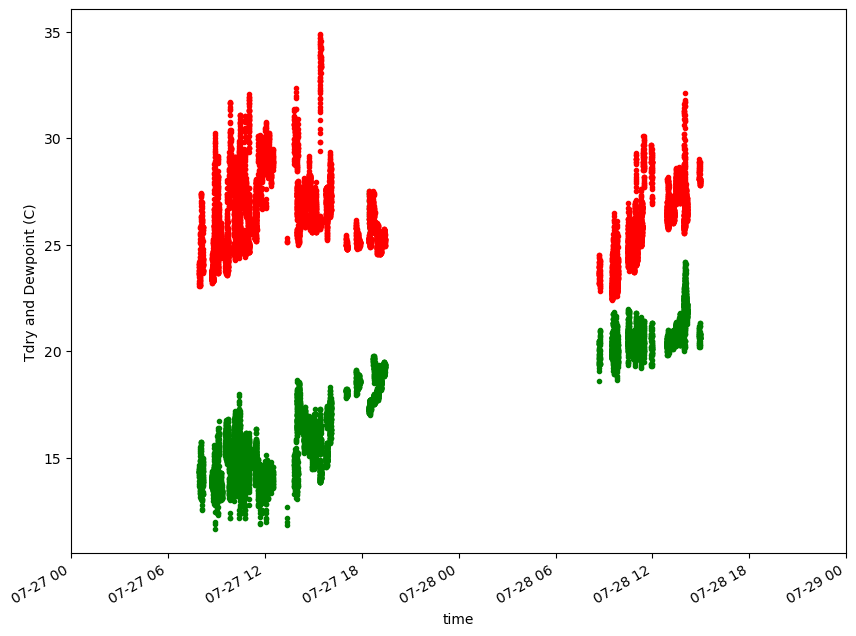

In [76]:
#time1 = pandas.Timestamp("2024-05-10 09:00:00")
#time2 = pandas.Timestamp("2024-05-10 12:00:00")


fm = plt.figure(figsize=[10,8])
#data['Dew Point'].plot(color='blue', label='Dewpoint(F)')
uber['Dew Point'].plot(color='green', label='Temperature(C)',marker='.', linestyle='none')

uber['Temperature'].plot(color='red', label='Temperature(C)',marker='.', linestyle='none')



plt.ylabel('Tdry and Dewpoint (C)')
plt.xlabel('time')
plt.xlim(['2024-07-27'], ['2024-07-29'])
##ax2 = plt.twinx()
##uber['Wind Speed'].plot(ax=ax2, color='blue', marker='.', linestyle='none')
#ax2.set_ylabel('Speed (km/h)')
#ax2.set_ylim([0,50])


(array([19931.33333333]), array([19931.75]))

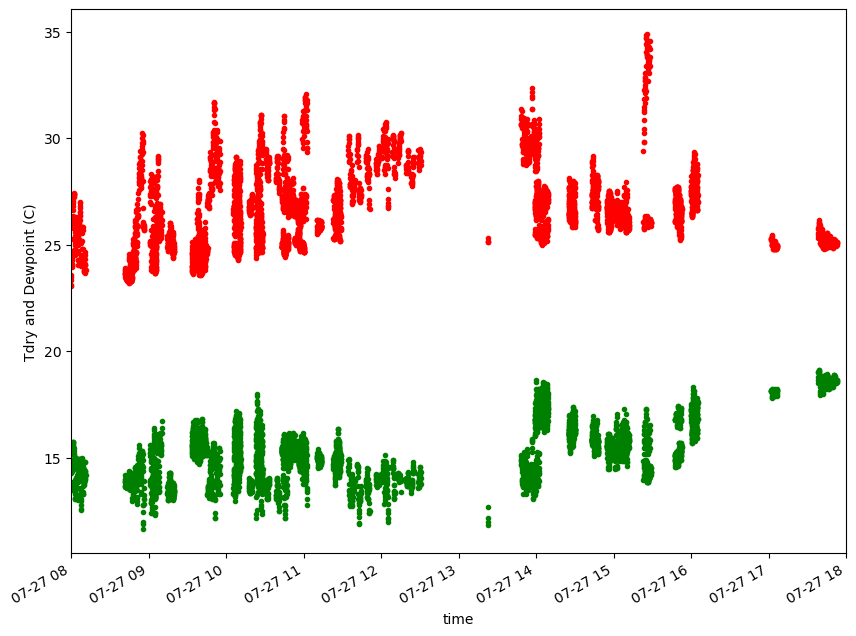

In [92]:
#time1 = pandas.Timestamp("2024-05-10 09:00:00")
#time2 = pandas.Timestamp("2024-05-10 12:00:00")


fm = plt.figure(figsize=[10,8])
#data['Dew Point'].plot(color='blue', label='Dewpoint(F)')
uber['Dew Point'].plot(color='green', label='Temperature(C)',marker='.', linestyle='none')

uber['Temperature'].plot(color='red', label='Temperature(C)',marker='.', linestyle='none')



plt.ylabel('Tdry and Dewpoint (C)')
plt.xlabel('time')
plt.xlim(['2024-07-27 08:00'], ['2024-07-27 18:00'])
##ax2 = plt.twinx()
##uber['Wind Speed'].plot(ax=ax2, color='blue', marker='.', linestyle='none')
#ax2.set_ylabel('Speed (km/h)')
#ax2.set_ylim([0,50])


<AxesSubplot: xlabel='time'>

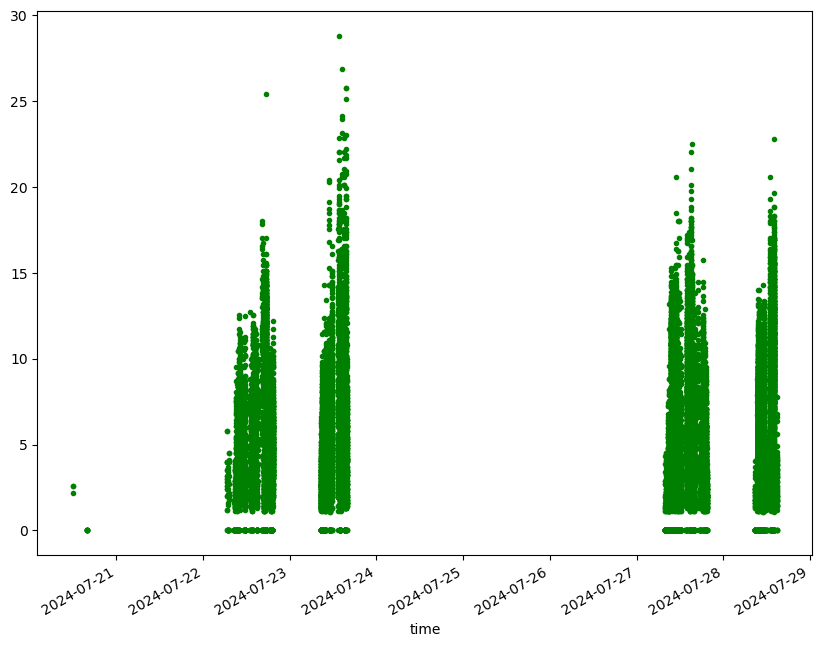

In [89]:
fm = plt.figure(figsize=[10,8])
#data['Dew Point'].plot(color='blue', label='Dewpoint(F)')
uber['Wind Speed'].plot(color='green', label='Wind Speed (km/h)',marker='.', linestyle='none')


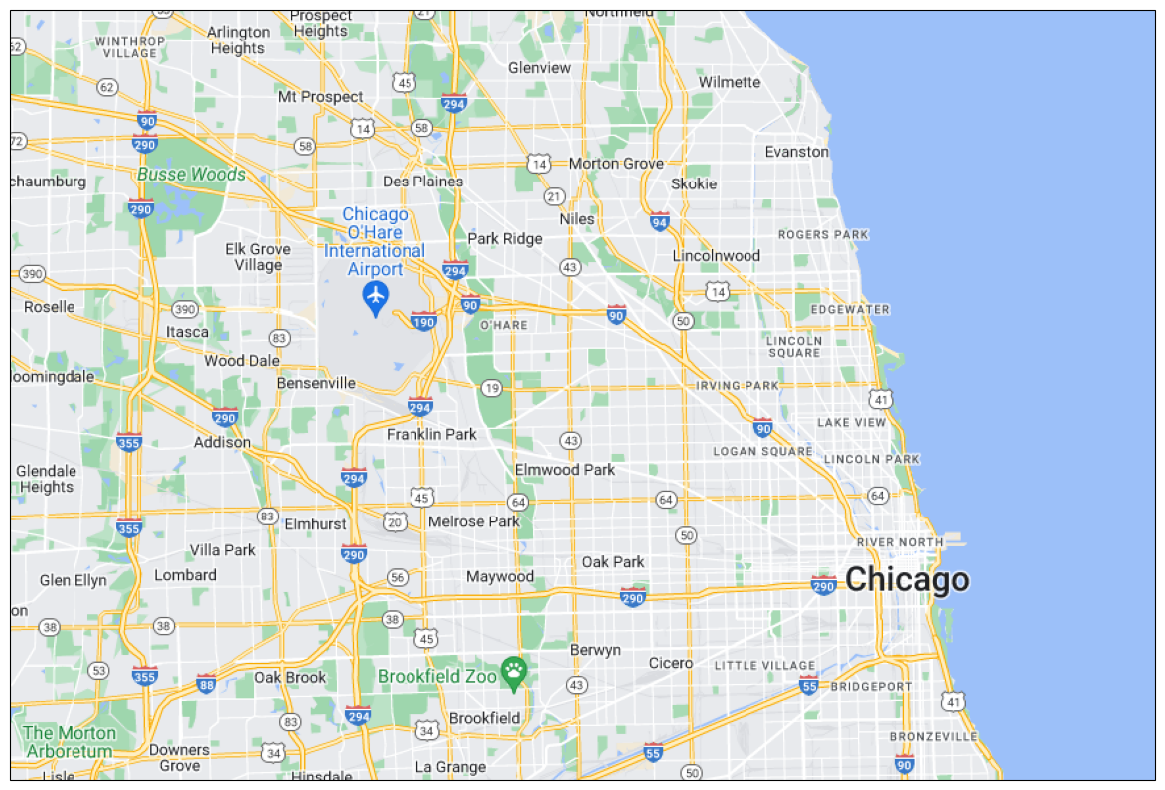

In [78]:
fig = plt.figure(figsize=(20, 10))
tiler = GoogleTiles(style="street")
mercator = tiler.crs
#add_metpy_logo(fig, 1100, 300, size='large')
ax = fig.add_subplot(1, 1, 1, projection=mercator)
ax.add_image(tiler, 11)
# Add coastlines and gridlines for reference

# Plot the points on the map
ax.scatter(uber['Longitude'].values, uber['Latitude'].values)
ax.set_extent((-88.1, -87.5, 41.8, 42.1))


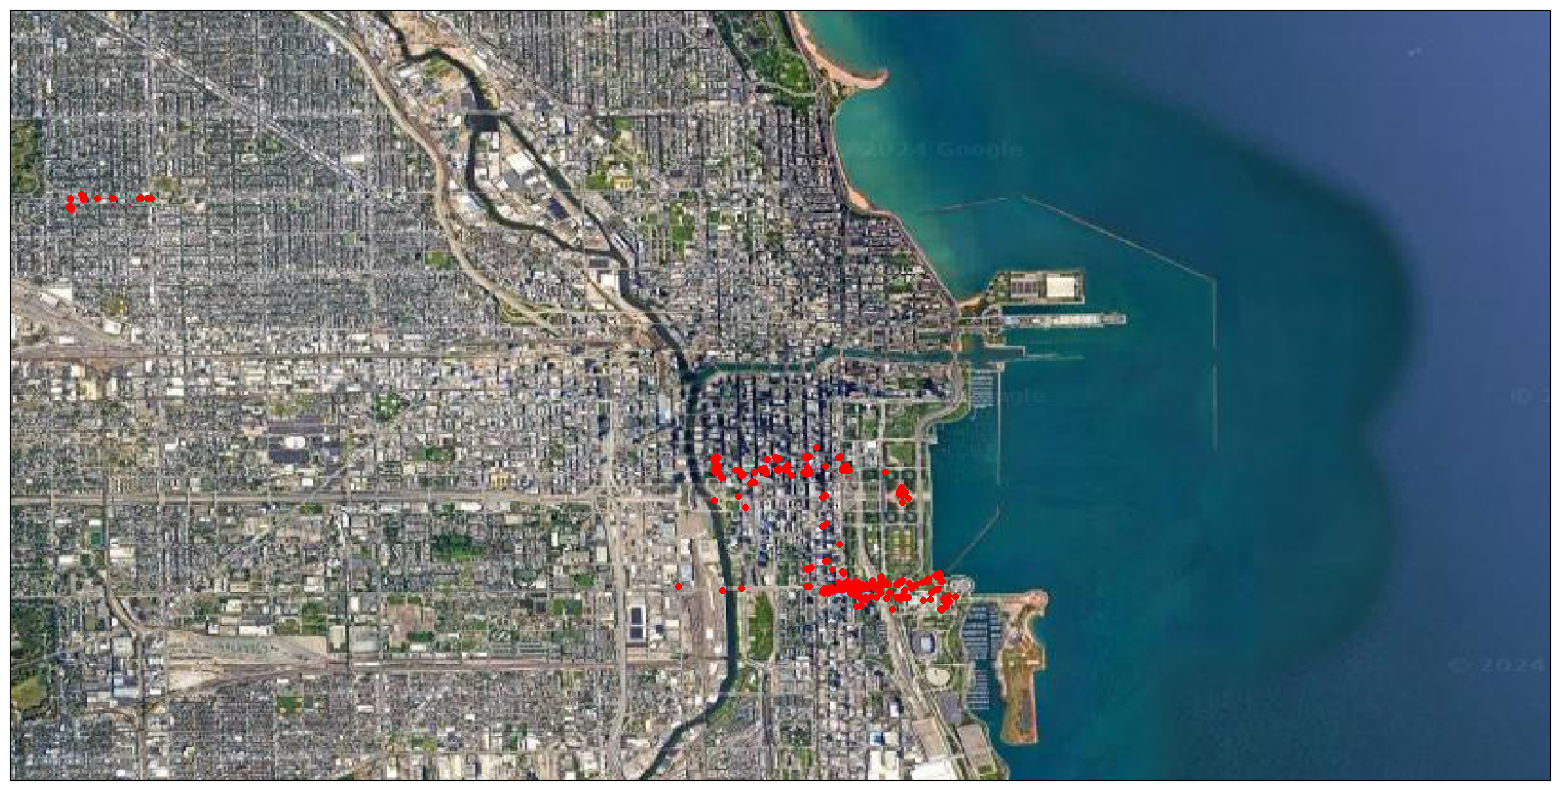

In [79]:
fig = plt.figure(figsize=(20, 10))
tiler = GoogleTiles(style="satellite")
pca = ccrs.PlateCarree() #tiler.crs
#add_metpy_logo(fig, 1100, 300, size='large')
ax = fig.add_subplot(1, 1, 1, projection=pca)
ax.add_image(tiler, 13)
#Add coastlines and gridlines for reference

# Plot the points on the map
ax.scatter(uber['Longitude'].values, uber['Latitude'].values,color='red', s=10)
ax.set_extent((-87.7, -87.56, 41.85, 41.92))


In [80]:
uber['Longitude'].values

array([-87.6147743, -87.6147743, -87.6147743, ..., -87.6190237,
       -87.6190237, -87.6190237])

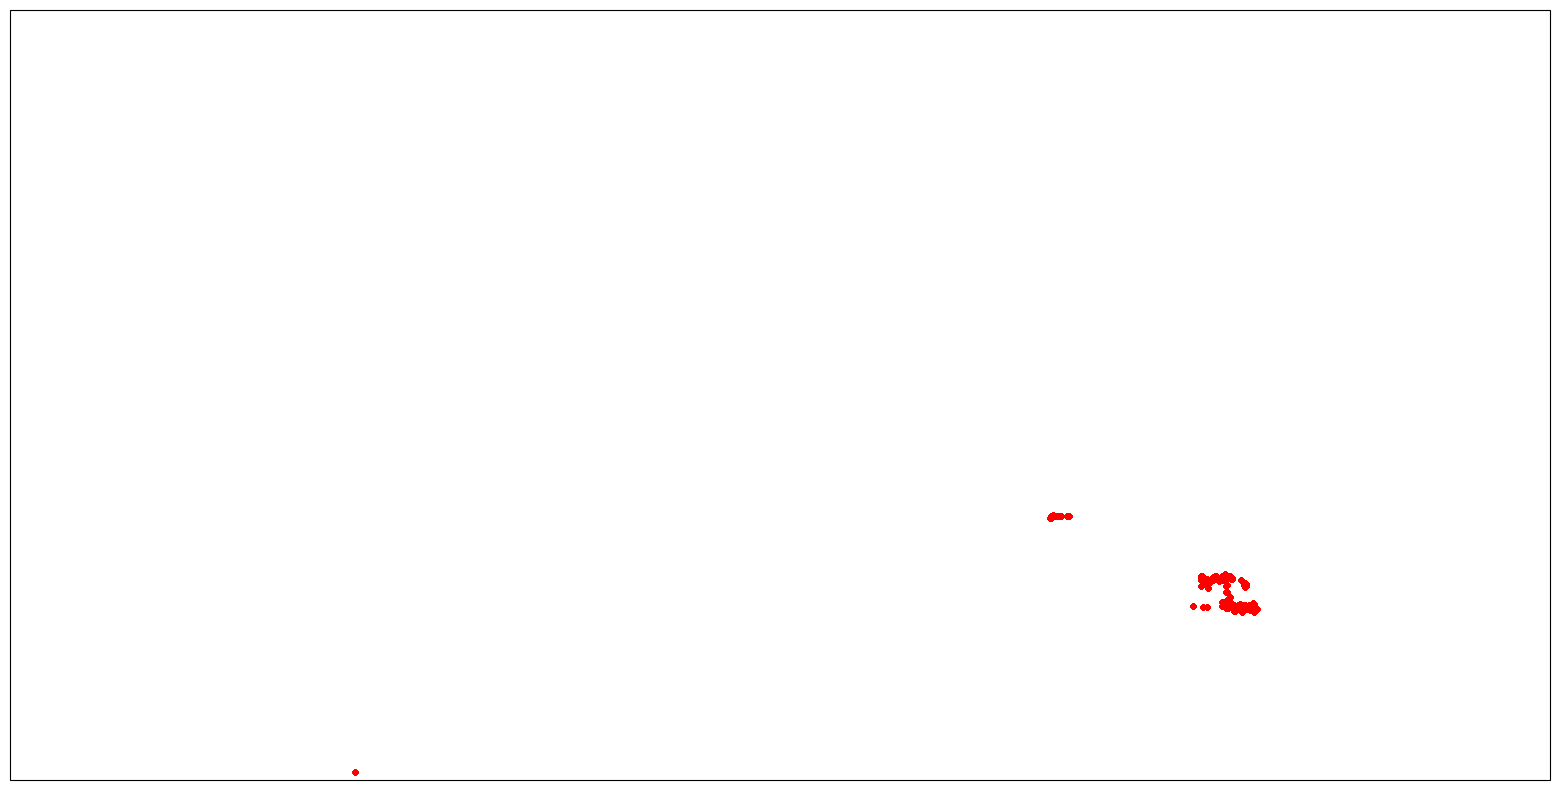

In [81]:
fig = plt.figure(figsize=(20, 10))
tiler = GoogleTiles(style="satellite")
pca = ccrs.PlateCarree() #tiler.crs
#add_metpy_logo(fig, 1100, 300, size='large')
ax = fig.add_subplot(1, 1, 1, projection=pca)
#ax.add_image(tiler, 11)
# Add coastlines and gridlines for reference

# Plot the points on the map
ax.scatter(uber['Longitude'].values, uber['Latitude'].values,color='red', s=10)
ax.set_extent((-88.1, -87.5, 41.8, 42.1))


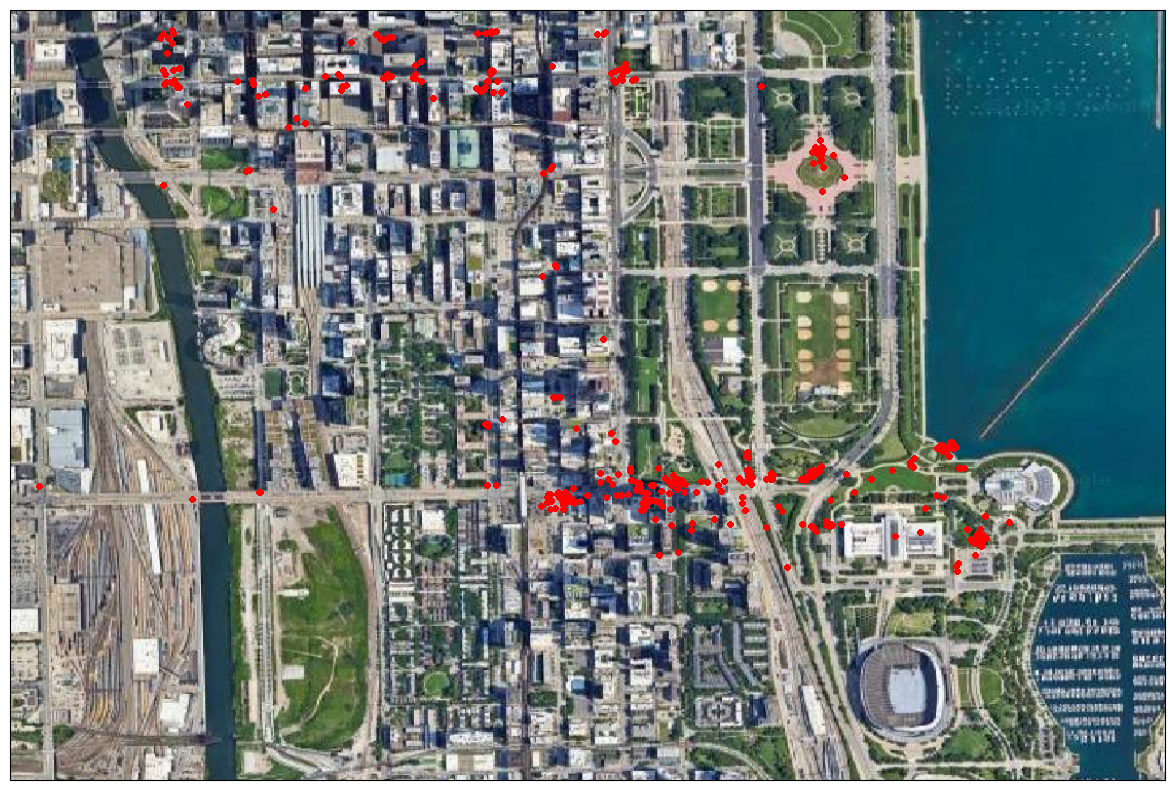

In [82]:
fig = plt.figure(figsize=(20, 10))
tiler = GoogleTiles(style="satellite")
pca = ccrs.PlateCarree() #tiler.crs
#add_metpy_logo(fig, 1100, 300, size='large')
ax = fig.add_subplot(1, 1, 1, projection=pca)
ax.add_image(tiler, 15)
# Add coastlines and gridlines for reference

# Plot the points on the map
ax.scatter(uber['Longitude'].values, uber['Latitude'].values,color='red', s=10)
ax.set_extent((-87.64, -87.61, 41.86, 41.88))


In [83]:
uber['Latitude'].values

array([41.8660824, 41.8660824, 41.8660824, ..., 41.8762485, 41.8762485,
       41.8762485])

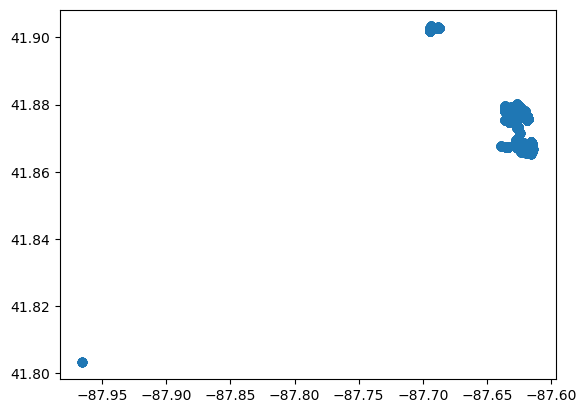

In [84]:
plt.scatter(uber['Longitude'], uber['Latitude'])

<AxesSubplot: xlabel='time'>

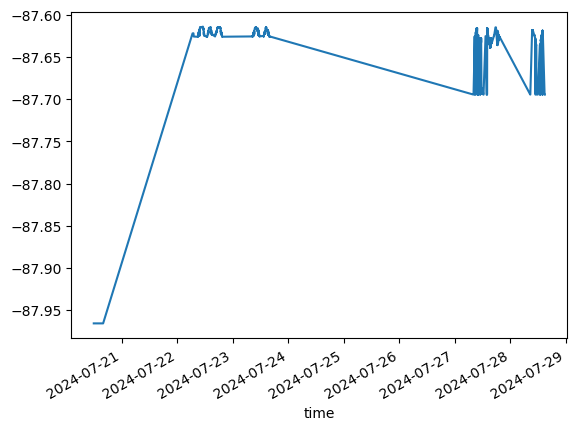

In [85]:
uber['Longitude'].plot()

In [86]:
uber['Longitude']

time
2024-07-22 10:05:44   -87.614774
2024-07-22 10:05:49   -87.614774
2024-07-22 10:05:54   -87.614774
2024-07-22 10:05:59   -87.614774
2024-07-22 10:06:04   -87.614774
                         ...    
2024-07-28 14:07:40   -87.619024
2024-07-28 14:07:45   -87.619024
2024-07-28 14:07:50   -87.619024
2024-07-28 14:07:55   -87.619024
2024-07-28 14:08:00   -87.619024
Name: Longitude, Length: 23019, dtype: float64

In [87]:
xr = xarray.Dataset.from_dataframe(uber)


In [88]:
xr.to_netcdf('/Users/scollis/Library/CloudStorage/Box-Box/data/kestrel.nc')